In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"bank-full.csv")

In [3]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: >

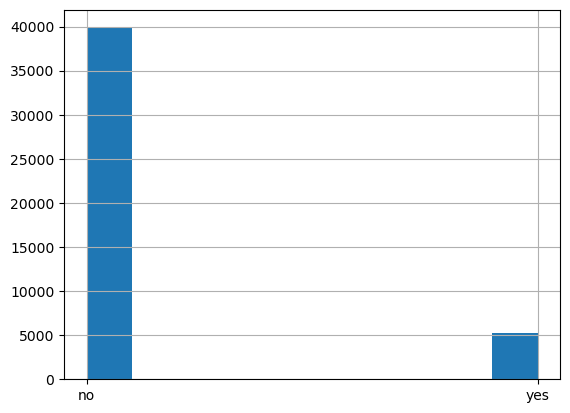

In [5]:
#Checking whether the data is balanced or not
data['y'].hist()

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('Not Subscribed', round(data['y'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Subscribed', round(data['y'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Not Subscribed 88.3 % of the dataset
Subscribed 11.7 % of the dataset


This is imblanced dataset since number of 0 is more than number of 1's.

#Data Pre-processing
1. Check for Missing values & duplicate values
2. Check for distribution of data
3. Check for outliers
4. treat categorial varaibles
5. scaling techniques

In [7]:
#checking for Missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in the data.

In [8]:
data.duplicated().sum()

0

In [9]:
data['job'] = data['job'].map({'admin.': 1,'bluecollar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,'selfemployed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':12})
data['marital'] = data['marital'].map({'divorced':1,'married':2,'single':3,'unknown':4})
data['education'] = data['education'].map({ 'primary':1,'secondary':2,'tertiary':3})
data['default'] = data['default'].map({ 'no':0,'yes':1})
data['housing'] = data['housing'].map({ 'no':0,'yes':1})
data['loan'] = data['loan'].map({ 'no':0,'yes':1})
data['contact'] = data['contact'].map({ 'cellular':1,'telephone':2})
data['month'] = data['month'].map({ 'jan':1, 'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10 ,'nov':11, 'dec':12})
data['poutcome'] = data['poutcome'].map({ 'failure':1,'nonexistent':2,'success':3})
data['y'] = data['y'].map({ 'no':0,'yes':1})
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5.0,2,3.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,10.0,3,2.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,3.0,2,2.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,NaN,2,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,12.0,3,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
5,35,5.0,2,3.0,0,231,1,0,NaN,5,5,139,1,-1,0,NaN,0
6,28,5.0,3,3.0,0,447,1,1,NaN,5,5,217,1,-1,0,NaN,0
7,42,3.0,1,3.0,1,2,1,0,NaN,5,5,380,1,-1,0,NaN,0
8,58,6.0,2,1.0,0,121,1,0,NaN,5,5,50,1,-1,0,NaN,0
9,43,10.0,3,2.0,0,593,1,0,NaN,5,5,55,1,-1,0,NaN,0


There are no duplicate values

C:\Users\Dishika\AppData\Local\Temp\ipykernel_5796\3789213918.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


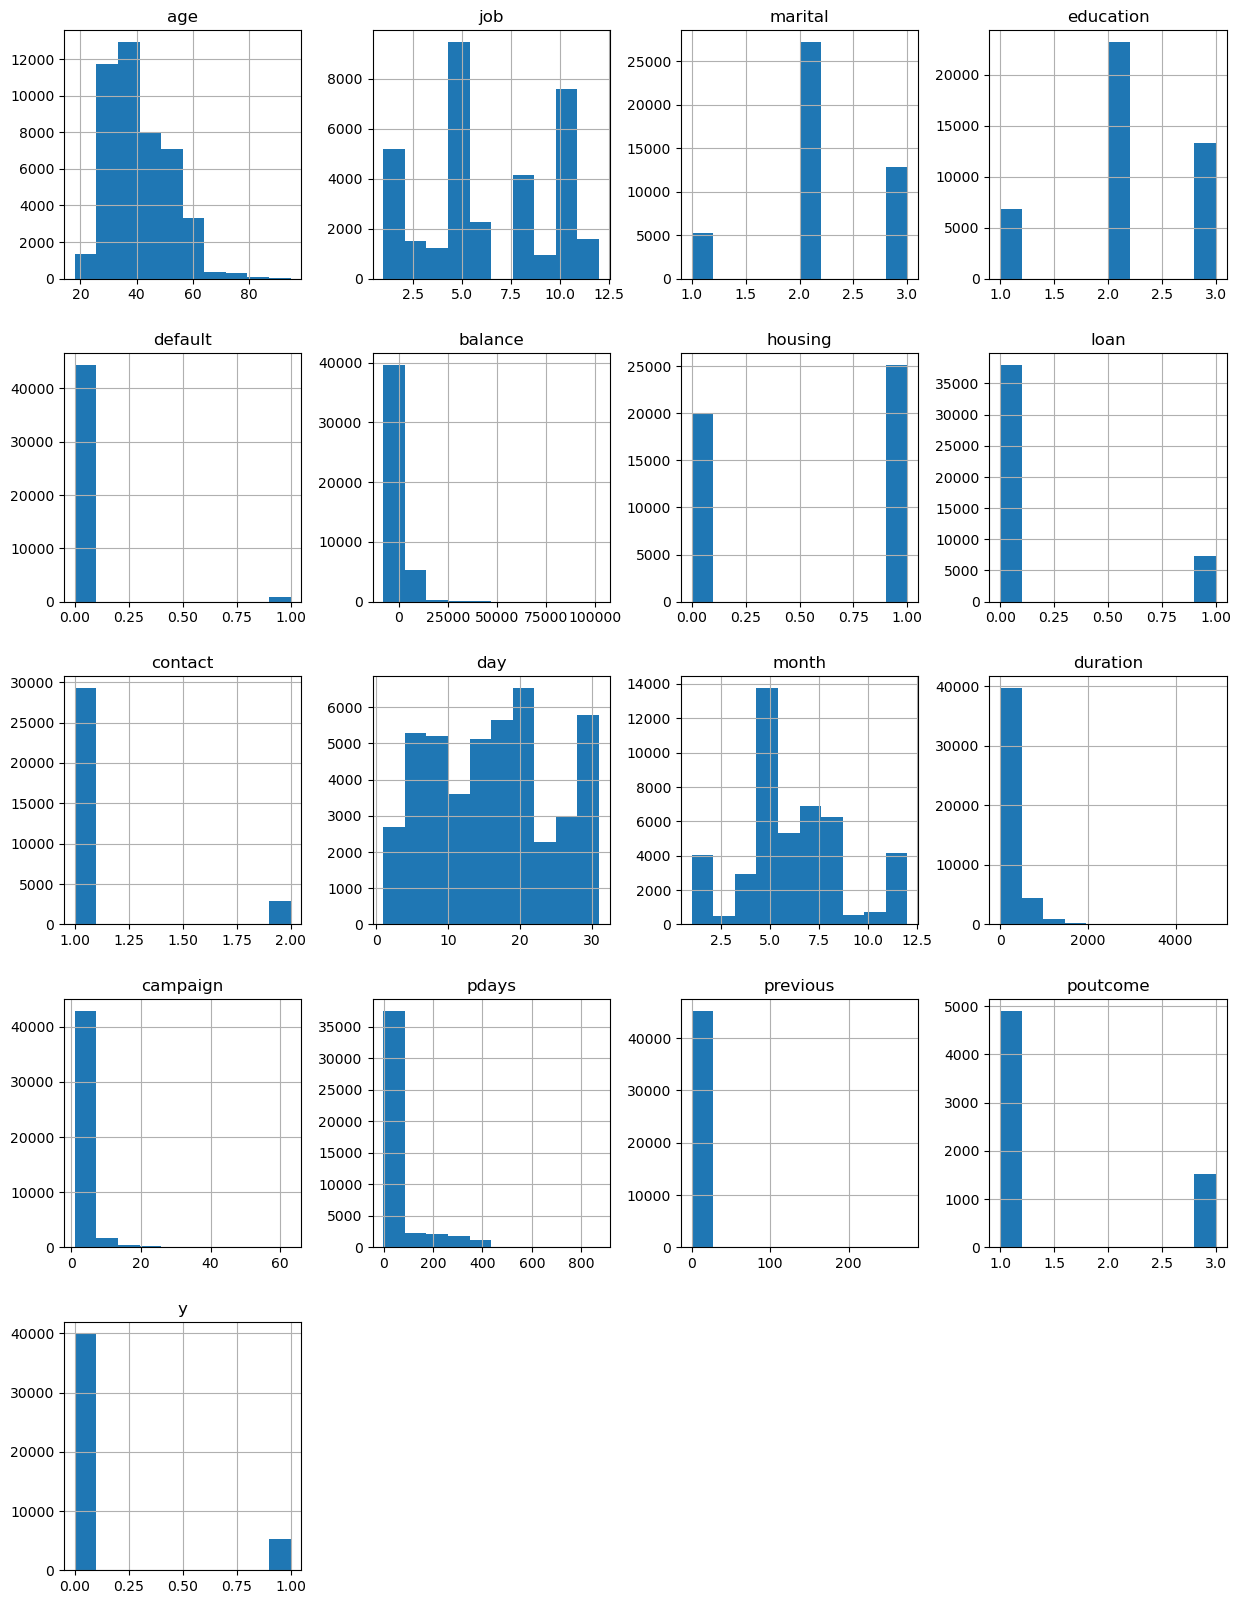

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

<Axes: xlabel='age'>

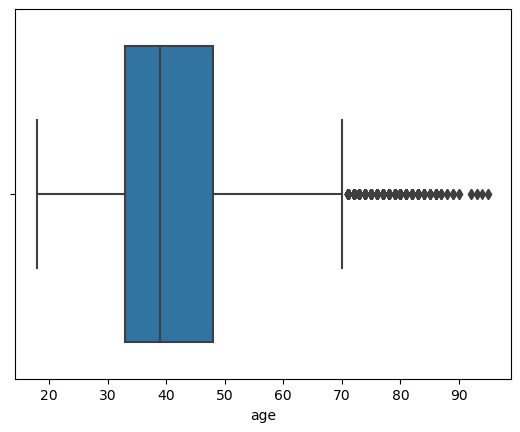

In [11]:
#checking for outliers
import seaborn as sns
sns.boxplot(x=data['age'])

<Axes: xlabel='balance'>

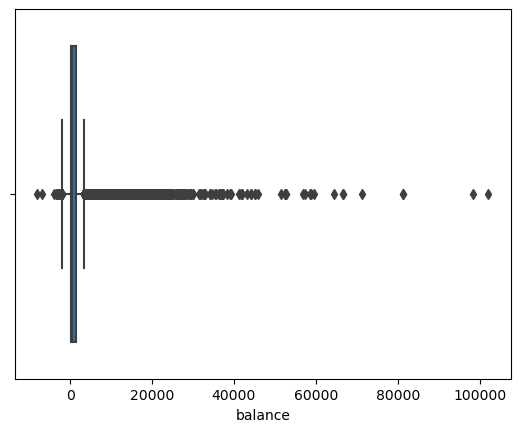

In [12]:
sns.boxplot(x=data['balance'])

<Axes: xlabel='duration'>

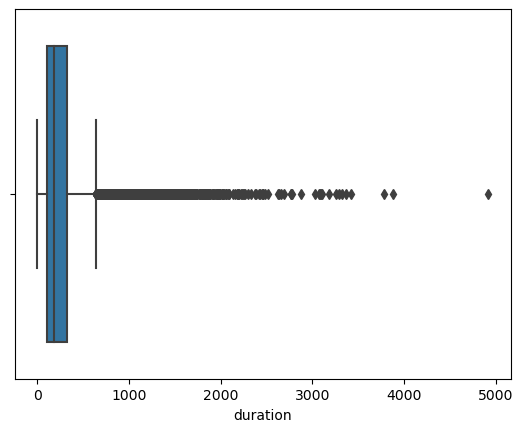

In [13]:
sns.boxplot(x=data['duration'])

<Axes: xlabel='campaign'>

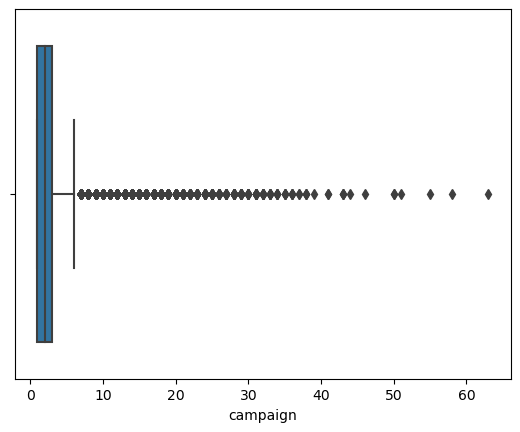

In [14]:
sns.boxplot(x=data['campaign'])

<Axes: xlabel='pdays'>

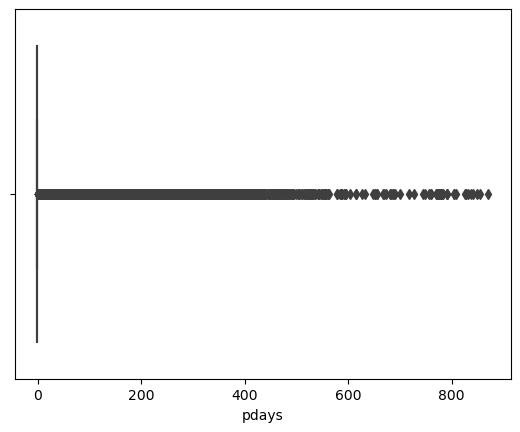

In [15]:
sns.boxplot(x=data['pdays'])

<Axes: xlabel='previous'>

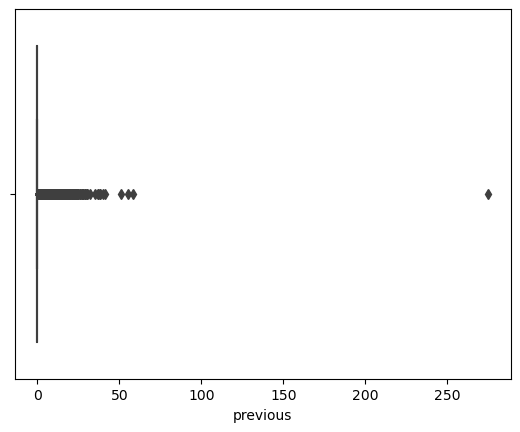

In [16]:
sns.boxplot(x=data['previous'])

In [17]:
#treating outliers
from scipy import stats
z = np.abs(stats.zscore(data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]))
print(z)

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([   34,    37,    43, ..., 45204, 45208, 45210], dtype=int64), array([1, 2, 2, ..., 5, 2, 5], dtype=int64))


In [19]:
#considering the values which are below 3 sigma limits and rest are ignored
#to check this look for the dimensions of the data
#created a new dataframe without outliers
df = data[(z < 3).all(axis=1)]
df.shape

(40209, 17)

In [20]:
df.shape

(40209, 17)

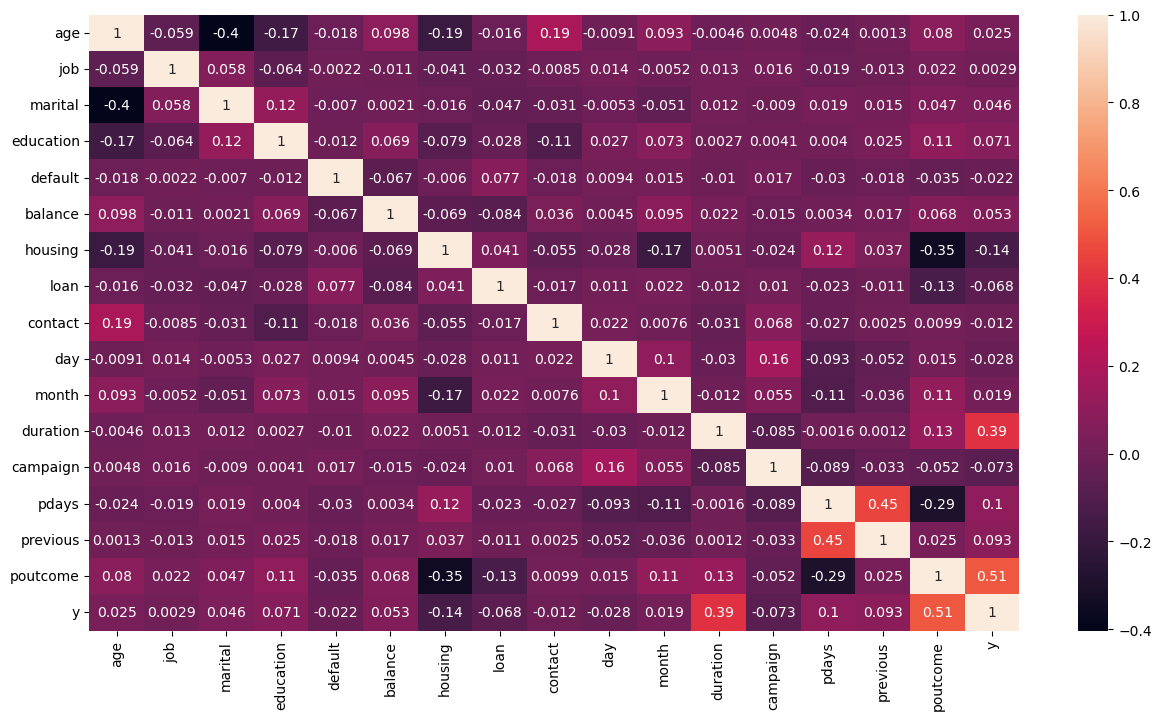

In [21]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [22]:
#checking for null values in the new dataframe
df.isnull().sum()

age              0
job          10062
marital          0
education     1628
default          0
balance          0
housing          0
loan             0
contact      12268
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     35682
y                0
dtype: int64

In [23]:
df = df.dropna(subset=['education'])
df['contact'] = df['contact'].fillna(1)
df['job'] = df['job'].fillna(5)

In [24]:
df.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     34229
y                0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38581 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        38581 non-null  int64  
 1   job        38581 non-null  float64
 2   marital    38581 non-null  int64  
 3   education  38581 non-null  float64
 4   default    38581 non-null  int64  
 5   balance    38581 non-null  int64  
 6   housing    38581 non-null  int64  
 7   loan       38581 non-null  int64  
 8   contact    38581 non-null  float64
 9   day        38581 non-null  int64  
 10  month      38581 non-null  int64  
 11  duration   38581 non-null  int64  
 12  campaign   38581 non-null  int64  
 13  pdays      38581 non-null  int64  
 14  previous   38581 non-null  int64  
 15  poutcome   4352 non-null   float64
 16  y          38581 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 5.3 MB


<Axes: >

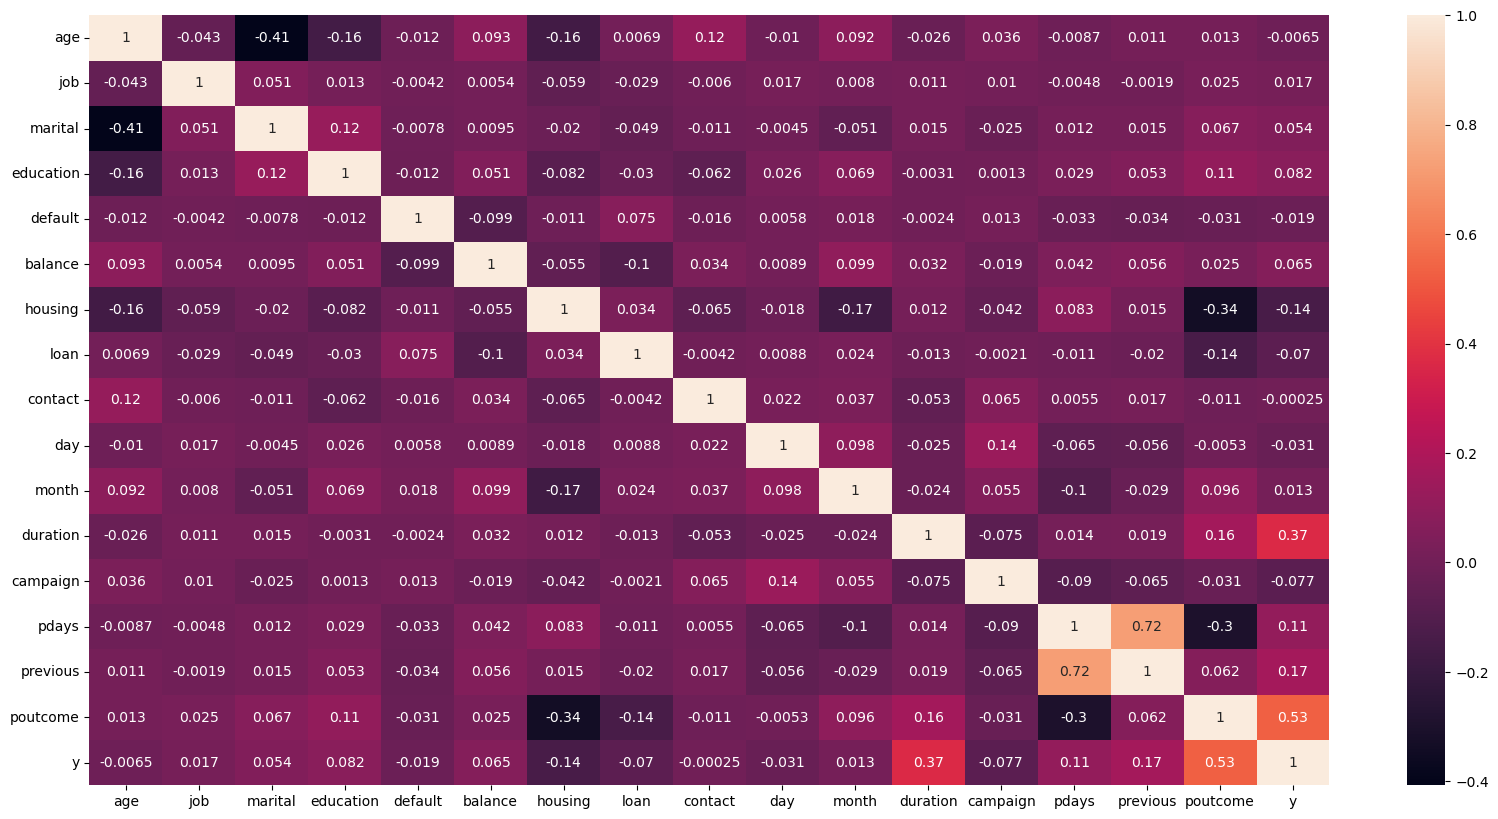

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [27]:
#setting the target variable
#defining dependent and independent variables
X_df = df.drop(['y','poutcome'],1)
y_df = df['y']

C:\Users\Dishika\AppData\Local\Temp\ipykernel_5796\2796587027.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_df = df.drop(['y','poutcome'],1)


In [28]:
import statsmodels.api as sm

res = sm.Logit(y_df,X_df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.246511
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38581
Model:                          Logit   Df Residuals:                    38566
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                  0.2423
Time:                        16:04:38   Log-Likelihood:                -9510.7
converged:                       True   LL-Null:                       -12553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0299      0.002    -16.793      0.000      -0.033      -0.026
job           -0.0313      0.007     -4.715      0.000      -0.044      -0.018
marital       -0.1970      0.029     -6.685      0.000      -0.255      -0.139
education      0.1113      0.028      4.017      0.000       0.057       0.166
default       -0.3606      0.176     -2.055      0.040      -0.705      -0.017
balance      5.85e-05   1.03e-05      5.682      0.000    3.83e-05    7.87e-05
housing       -1.4744      0.041    -35.900      0.000      -1.555      -1.394
loan          -0.8410      0.065    -12.993      0.000      -0.968      -0.714
contact       -0.8090      0.095     -8.477      0.000      -0.996      -0.622
day           -0.0147      0.002     -6.449      0.000      -0.019      -0.010
month         -0.0292      0.007     -3.968      0.000      -0.044      -0.015
duration       0.0050   8.48e-05     59.450      0.000       0.005       0.005
campaign      -0.1996      0.014    -14.573      0.000      -0.226      -0.173
pdays          0.0011      0.000      3.432      0.001       0.000       0.002
previous       0.3414      0.018     18.472      0.000       0.305       0.378
==============================================================================
"""

In [29]:
#Removing values having p value greater than 0.05
#X_df.drop(['AGE',"PAY_5","PAY_6","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5"],1,inplace=True)
res = sm.Logit(y_df,X_df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.246511
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38581
Model:                          Logit   Df Residuals:                    38566
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                  0.2423
Time:                        16:04:39   Log-Likelihood:                -9510.7
converged:                       True   LL-Null:                       -12553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0299      0.002    -16.793      0.000      -0.033      -0.026
job           -0.0313      0.007     -4.715      0.000      -0.044      -0.018
marital       -0.1970      0.029     -6.685      0.000      -0.255      -0.139
education      0.1113      0.028      4.017      0.000       0.057       0.166
default       -0.3606      0.176     -2.055      0.040      -0.705      -0.017
balance      5.85e-05   1.03e-05      5.682      0.000    3.83e-05    7.87e-05
housing       -1.4744      0.041    -35.900      0.000      -1.555      -1.394
loan          -0.8410      0.065    -12.993      0.000      -0.968      -0.714
contact       -0.8090      0.095     -8.477      0.000      -0.996      -0.622
day           -0.0147      0.002     -6.449      0.000      -0.019      -0.010
month         -0.0292      0.007     -3.968      0.000      -0.044      -0.015
duration       0.0050   8.48e-05     59.450      0.000       0.005       0.005
campaign      -0.1996      0.014    -14.573      0.000      -0.226      -0.173
pdays          0.0011      0.000      3.432      0.001       0.000       0.002
previous       0.3414      0.018     18.472      0.000       0.305       0.378
==============================================================================
"""

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_df, y_df)

C:\Users\Dishika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
y_pred = classifier.predict(X_df)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_df, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[34163   555]
 [ 3261   602]]


In [33]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_df, y_pred))

Accuracy :  0.9010912106995671


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_df, y_df.ravel())

predictions = lr.predict(X_df)

# print classification report
print(classification_report(y_df, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     34718
           1       0.52      0.16      0.24      3863

    accuracy                           0.90     38581
   macro avg       0.72      0.57      0.59     38581
weighted avg       0.87      0.90      0.88     38581



C:\Users\Dishika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SMOTE for imbalanced Dataset

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
#The numbers before SMOTE
num_before = dict(Counter(y_df))

#Performing SMOTE

#Define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#Transforming the dataset
X_df_smote, y_df_smote = pipeline.fit_resample(X_df,y_df)


#Tthe numbers after SMOTE
num_after = dict(Counter(y_df_smote))

In [38]:
print(num_before, num_after)

{0: 34718, 1: 3863} {0: 34717, 1: 27774}


In [39]:
num_before

{0: 34718, 1: 3863}

In [40]:
print(X_df_smote)

       age        job  marital  education  default  balance  housing  loan  \
0       45   5.000000        2   1.000000        0     1992        1     0   
1       45  10.000000        3   2.000000        0     1196        1     0   
2       35   5.000000        2   2.000000        0        0        1     0   
3       54   5.000000        2   1.000000        0        0        0     1   
4       41   5.000000        1   3.000000        0     4717        1     0   
...    ...        ...      ...        ...      ...      ...      ...   ...   
62486   60   5.791360        2   2.208640        0        0        0     0   
62487   29   4.728680        2   3.000000        0     6769        0     0   
62488   64   1.299717        2   2.074929        0      955        0     0   
62489   30   5.703592        3   2.824102        0     1629        0     0   
62490   36   5.000000        1   1.302937        0        0        1     0   

       contact  day  month  duration  campaign  pdays  previous

# creating new dataframe after applying SMOTE

In [41]:
X1 = pd.DataFrame(X_df_smote)
y1= pd.DataFrame(y_df_smote)

In [42]:
new_data = pd.concat([X1, y1], axis=1)
new_data.columns = ['age', 'job', 'marital', 'education','default', 'balance',
       'housing', 'loan','contact','day','month',
       'duration', 'campaign', 'pdays', 'previous', 'y']

In [43]:
#final_data = new_data.drop(['ID'],1)
final_data = new_data

In [44]:
#FINDING THE NUMBER OF OUTLIERS
subscribed = final_data[final_data['y']==1]
not_subscribed = final_data[final_data['y']==0]
outlier_fraction = len(subscribed)/float(len(not_subscribed))

In [45]:
print(outlier_fraction)
print("subscribed : {}".format(len(subscribed)))
print("not_subscribed : {}".format(len(not_subscribed)))

0.8000115217328686
subscribed : 27774
not_subscribed : 34717


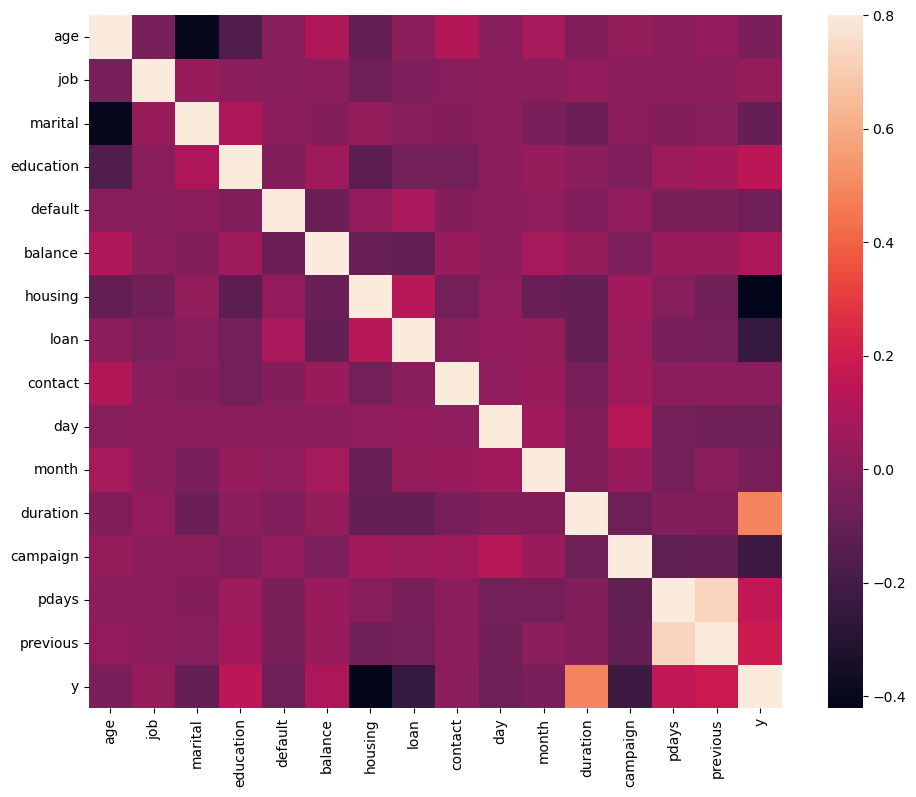

In [46]:
correlation_matrix = final_data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [47]:
#setting the target variable
#defining dependent and independent variables
X1 = final_data.drop(['y'],1)
Y1 = final_data['y']

C:\Users\Dishika\AppData\Local\Temp\ipykernel_5796\2726994489.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = final_data.drop(['y'],1)


In [48]:
# Print the shapes of X & Y
print(X1.shape)
print(Y1.shape)

(62491, 15)
(62491,)


In [49]:
import collections
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [50]:
columns = final_data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["y"]]
# Store the variable we are predicting
target = "y"
# Define a random state
state = np.random.RandomState(42)
X = final_data[columns]
Y = final_data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X1.shape)
print(Y1.shape)

(62491, 15)
(62491,)


In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62491 entries, 0 to 62490
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        62491 non-null  int64  
 1   job        62491 non-null  float64
 2   marital    62491 non-null  int64  
 3   education  62491 non-null  float64
 4   default    62491 non-null  int64  
 5   balance    62491 non-null  int64  
 6   housing    62491 non-null  int64  
 7   loan       62491 non-null  int64  
 8   contact    62491 non-null  float64
 9   day        62491 non-null  int64  
 10  month      62491 non-null  int64  
 11  duration   62491 non-null  int64  
 12  campaign   62491 non-null  int64  
 13  pdays      62491 non-null  int64  
 14  previous   62491 non-null  int64  
 15  y          62491 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 7.6 MB


In [52]:
#LR classifier after SMOTE
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X1, Y1)

C:\Users\Dishika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [53]:
y_pred = classifier.predict(X1)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y1, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[29238  5479]
 [ 6824 20950]]


In [55]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y1, y_pred))

Accuracy :  0.803123649805572


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X1, Y1.ravel())

predictions = lr.predict(X)

# print classification report
print(classification_report(Y1, predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     34717
           1       0.79      0.75      0.77     27774

    accuracy                           0.80     62491
   macro avg       0.80      0.80      0.80     62491
weighted avg       0.80      0.80      0.80     62491



C:\Users\Dishika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test  = train_test_split(X1, Y1,test_size=.3, stratify=Y1, random_state=42)

In [58]:
print(X1_train.shape)
print(Y1_train.shape)

(43743, 15)
(43743,)


In [59]:
print(X1_test.shape)
print(Y1_test.shape)

(18748, 15)
(18748,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X1_train, Y1_train)

DecisionTreeClassifier()

In [61]:
dt_pred = dt.predict(X1)

In [62]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(Y1, dt_pred)

print ("Confusion Matrix : \n", dt_cm)

Confusion Matrix : 
 [[33659  1058]
 [  828 26946]]


In [63]:
from sklearn.metrics import accuracy_score
print ("Dt_Accuracy : ", accuracy_score(Y1, dt_pred))

Dt_Accuracy :  0.9698196540301803


In [64]:
# logistic regression object
dt = DecisionTreeClassifier()

# train the model on train set
dt.fit(X1, Y1.ravel())

dt_predictions = dt.predict(X)

# print classification report
print(classification_report(Y1, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34717
           1       1.00      1.00      1.00     27774

    accuracy                           1.00     62491
   macro avg       1.00      1.00      1.00     62491
weighted avg       1.00      1.00      1.00     62491



In [65]:
#Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X1_train, Y1_train)

RandomForestClassifier()

In [66]:
rf_pred = rf.predict(X1)

In [67]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(Y1, rf_pred)

print ("Confusion Matrix : \n", rf_cm)

Confusion Matrix : 
 [[34114   603]
 [  538 27236]]


In [68]:
from sklearn.metrics import accuracy_score
print ("RF_Accuracy : ", accuracy_score(Y1, rf_pred))

RF_Accuracy :  0.9817413707573891


In [69]:
# logistic regression object
rf = RandomForestClassifier()

# train the model on train set
rf.fit(X1, Y1.ravel())

rf_predictions = rf.predict(X)

# print classification report
print(classification_report(Y1, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34717
           1       1.00      1.00      1.00     27774

    accuracy                           1.00     62491
   macro avg       1.00      1.00      1.00     62491
weighted avg       1.00      1.00      1.00     62491



In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X1_train, Y1_train, X1_test, Y1_test, train=True):
    if train:
        pred = clf.predict(X1_train)
        clf_report = pd.DataFrame(classification_report(Y1_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y1_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y1_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X1_test)
        clf_report = pd.DataFrame(classification_report(Y1_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y1_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y1_test, pred)}\n")

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X1_train, Y1_train)

print_score(tree_clf, X1_train, Y1_train, X1_test, Y1_test, train=True)
print_score(tree_clf, X1_train, Y1_train, X1_test, Y1_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    24302.0  19441.0       1.0    43743.0       43743.0
_______________________________________________
Confusion Matrix: 
 [[24302     0]
 [    0 19441]]

Test Result:
Accuracy Score: 89.92%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917368     0.877549  0.899243      0.897458      0.899669
recall         0.899664     0.898716  0.899243      0.899190      0.899243
f1-score       0.908430     0.888006  0.899243      0.898218      0.899352
support    10415.000000  8333.000000  0.899243  18748.000000  18748.0